# MSDS 6372 Logistic Regression & Linear Discriminant Analysis

## Project 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Read the data
kobe = pd.read_csv('KobeDataProj2.csv')

## Exploratory Data Analysis

In [4]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2,14707,69,94.06
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3,14707,69,94.06
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4,14707,69,94.06
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5,14707,69,94.06
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6,14707,69,94.06


In [5]:
kobe.shape

(30697, 28)

In [6]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

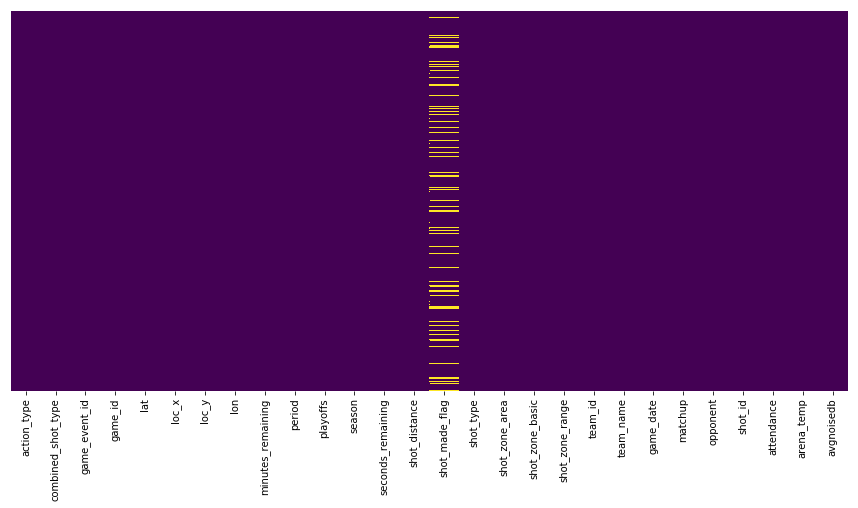

In [7]:
# To get a top view of missing data use heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(data = kobe.isnull(), yticklabels =False, cbar=False, cmap='viridis')

In [8]:
kobe_full = kobe.drop(['shot_made_flag'], axis =1)

In [9]:
#kobe_full.info()

In [10]:
kobe_full.shape

(30697, 27)

In [11]:
# Deal with categorical values in full data

action_type_dmyfull = pd.get_dummies(kobe_full['action_type'], drop_first=True)
combined_shot_type_dmyfull = pd.get_dummies(kobe_full['combined_shot_type'], drop_first=True)
shot_type_dmyfull = pd.get_dummies(kobe_full['shot_type'], drop_first=True)
shot_zone_area_dmyfull = pd.get_dummies(kobe_full['shot_zone_area'], drop_first=True)
shot_zone_basic_dmyfull = pd.get_dummies(kobe_full['shot_zone_basic'], drop_first=True)
shot_zone_range_dmyfull = pd.get_dummies(kobe_full['shot_zone_range'], drop_first=True)
#team_name_dmyfull = pd.get_dummies(kobe_full['team_name'], drop_first=True) # Removed since not useful
matchup_dmyfull = pd.get_dummies(kobe_full['matchup'], drop_first=True)
opponent_dmyfull = pd.get_dummies(kobe_full['opponent'], drop_first=True)
season_dmyfull = pd.get_dummies(kobe_full['season'], drop_first=True)

In [12]:
# Concatenate the Dummy variables to the full DF

In [13]:
kobe_full = pd.concat([kobe_full,action_type_dmyfull,combined_shot_type_dmyfull,shot_type_dmyfull,
                       shot_zone_area_dmyfull,
                       shot_zone_basic_dmyfull,shot_zone_range_dmyfull,matchup_dmyfull,
                       opponent_dmyfull,season_dmyfull], 
                       axis = 1 )

In [14]:
kobe_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 228 entries, action_type to 2015-16
dtypes: float64(3), int64(13), object(11), uint8(201)
memory usage: 12.2+ MB


In [15]:
# Drop the categorical variables existing in the full DF, Included date 'game_date' to drop for now, need review this.

full = kobe_full.drop(['action_type','combined_shot_type','shot_type','shot_zone_area','shot_zone_basic',
                         'shot_zone_range','team_name','team_id','matchup','opponent','game_date','season'], axis = 1 )

In [16]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 216 entries, game_event_id to 2015-16
dtypes: float64(3), int64(12), uint8(201)
memory usage: 9.4 MB


In [17]:
from sklearn.preprocessing import StandardScaler
scalarfull = StandardScaler()
scalarfull.fit(full.drop(['shot_id'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scalarfull_data = scalarfull.transform(full.drop(['shot_id'], axis=1))

In [19]:
scalarfull_data_df = pd.DataFrame(scalarfull_data, columns = full.drop(['shot_id'], axis=1).columns)

In [20]:
scalarfull_data_df.shape

(30697, 215)

In [21]:
scalarfull_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 215 entries, game_event_id to 2015-16
dtypes: float64(215)
memory usage: 50.4 MB


In [22]:
scalarfull_data_df.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,-1.581259,-0.614316,1.037790,-1.490250,-1.037790,-1.490250,1.482496,-1.317069,-0.414404,-0.364163,...,-0.255926,-0.274641,-0.280697,-0.2696,-0.251416,-0.237343,-0.233955,-0.048824,-0.154206,-0.193963
1,-1.427927,-0.614316,-0.499972,-0.981727,0.499972,-0.981727,0.612891,-1.317069,-0.414404,0.951727,...,-0.255926,-0.274641,-0.280697,-0.2696,-0.251416,-0.237343,-0.233955,-0.048824,-0.154206,-0.193963
2,-1.374594,-0.614316,-0.955605,1.188578,0.955605,1.188578,0.323022,-1.317069,-0.414404,1.352215,...,-0.255926,-0.274641,-0.280697,-0.2696,-0.251416,-0.237343,-0.233955,-0.048824,-0.154206,-0.193963
3,-0.627933,-0.614316,1.037790,-0.064569,-1.037790,-0.064569,0.323022,-0.450252,-0.414404,-0.535801,...,-0.255926,-0.274641,-0.280697,-0.2696,-0.251416,-0.237343,-0.233955,-0.048824,-0.154206,-0.193963
4,-0.034605,-0.614316,1.163089,-1.381281,-1.163089,-1.381281,1.192628,0.416564,-0.414404,0.207963,...,-0.255926,-0.274641,-0.280697,-0.2696,-0.251416,-0.237343,-0.233955,-0.048824,-0.154206,-0.193963


In [23]:
#After Standardising Encode the Data

from sklearn import utils
from sklearn.preprocessing import LabelEncoder

In [24]:
scalarfull_data_encod_df = scalarfull_data_df.apply(LabelEncoder().fit_transform)

In [25]:
scalarfull_data_encod_df.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,10,0,413,88,43,88,10,0,0,22,...,0,0,0,0,0,0,0,0,0,0
1,33,0,278,144,178,144,7,0,0,45,...,0,0,0,0,0,0,0,0,0,0
2,41,0,238,383,218,383,6,0,0,52,...,0,0,0,0,0,0,0,0,0,0
3,153,0,413,245,43,245,6,1,0,19,...,0,0,0,0,0,0,0,0,0,0
4,242,0,424,100,32,100,9,2,0,32,...,0,0,0,0,0,0,0,0,0,0


In [26]:
scalarfull_data_encod_df = pd.DataFrame(pd.concat([scalarfull_data_encod_df,
                                                   kobe[['shot_made_flag', 'shot_id']]], axis=1 ))

In [27]:
scalarfull_data_encod_df.shape

(30697, 217)

### Train Data

In [28]:
scalarfull_data_encod_df_train = scalarfull_data_encod_df.dropna()

In [29]:
scalarfull_data_encod_df_train.shape

(25697, 217)

### Test Data

In [30]:
scalarfull_data_encod_df_test = scalarfull_data_encod_df[scalarfull_data_encod_df['shot_made_flag'].isnull()]


In [31]:
scalarfull_data_encod_df_test.shape

(5000, 217)

### Missing values Data to be predicted



In [32]:
# Missing values Data to be predicted

y_to_predict = pd.DataFrame(scalarfull_data_encod_df_test.drop(['shot_made_flag'], axis =1))

In [33]:
y_to_predict.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,shot_id
9,8,0,341,412,115,412,10,0,0,27,...,0,0,0,0,0,0,0,0,0,1
10,252,0,385,246,71,246,8,2,0,5,...,0,0,0,0,0,0,0,0,0,8
30,98,1,413,245,43,245,0,0,0,1,...,0,0,0,0,0,0,0,0,0,17
31,247,1,413,245,43,245,10,2,0,46,...,0,0,0,0,0,0,0,0,0,20
44,2,2,337,408,119,408,11,0,0,26,...,0,0,0,0,0,0,0,0,0,33


In [34]:
y_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9 to 30696
Columns: 216 entries, game_event_id to shot_id
dtypes: int64(216)
memory usage: 8.3 MB


In [35]:
X = scalarfull_data_encod_df_train.drop(['shot_made_flag'], axis = 1)
y = scalarfull_data_encod_df_train['shot_made_flag']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
logismodelfull = LogisticRegression()

In [39]:
logismodelfull.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Predictions and Evaluations
predictions = logismodelfull.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [42]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

        0.0       0.85      0.67      0.75      5490
        1.0       0.46      0.71      0.56      2220

avg / total       0.74      0.68      0.69      7710



In [43]:
print(confusion_matrix(y_test,predictions))

[[3656  640]
 [1834 1580]]


In [44]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test,predictions)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3656  640]
 [1834 1580]]


In [77]:
log_loss_logReg = log_loss(y_test, predictions)
print('Log Loss',log_loss(y_test, predictions))
print('\n')
print('AUC',roc_auc_score(y_test, predictions))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, predictions))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, predictions))

Log Loss 11.0829370355


AUC 0.656912221448


Sensitivity 0.489228085478
recall_score 0.462800234329


Specificity 0.490514333895


classification_error 0.510059540024
1 - accuracy_score 0.320881971466


### Final Predictions on the missing values - Logistic Regression 

In [117]:
# Predictions on the unknown
predictions_final = logismodelfull.predict(y_to_predict)

In [118]:
predictions_final.shape

(5000,)

In [119]:
predictions_final_df = pd.DataFrame(columns = ['shot_made_flag' ] ) # ,'shot_id'


In [120]:
predictions_final_df.shape

(0, 1)

In [121]:
predictions_final_df['shot_made_flag']= predictions_final

In [122]:
shot_id = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [123]:
shot_id= shot_id.reset_index(drop=True)

In [124]:
predictions_final_df = pd.concat([predictions_final_df, shot_id], axis =1)

In [125]:

predictions_final_df.head()
predictions_final_df.tail()

,shot_made_flag,shot_id
4995,0.0,30681
4996,1.0,30683
4997,1.0,30687
4998,0.0,30694
4999,0.0,22988


In [126]:
predictions_final_df.count()

shot_made_flag    5000
shot_id           5000
dtype: int64

In [127]:
predictions_final_df['shot_id'].count()

5000

In [128]:
#predictions_final_df.drop( ['shot_id','shot_made_flag'],axis =1, inplace=True)

In [129]:
predictions_final_df.shape

(5000, 2)

## End of Logistic Regression 

In [115]:
# Create new df with no nan to be used for test and train sets.

kobe_train = kobe.dropna()

In [116]:
kobe_train.shape

(25697, 28)

In [117]:
kobe_train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2,14707,69,94.06
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3,14707,69,94.06
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4,14707,69,94.06
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5,14707,69,94.06
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6,14707,69,94.06


In [119]:
# Create new df with nan values to be used for predictions

kobe_test = kobe[kobe['shot_made_flag'].isnull()]

In [120]:
kobe_test.shape

(5000, 28)

In [121]:
kobe_test.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
9,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,1,14707,69,94.06
10,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,8,14707,69,94.06
30,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/1/00,LAL vs. UTA,UTA,17,15851,69,95.71
31,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/1/00,LAL vs. UTA,UTA,20,15851,69,95.71
44,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,16-24 ft.,1610612747,Los Angeles Lakers,11/4/00,LAL @ VAN,VAN,33,14081,72,95.09


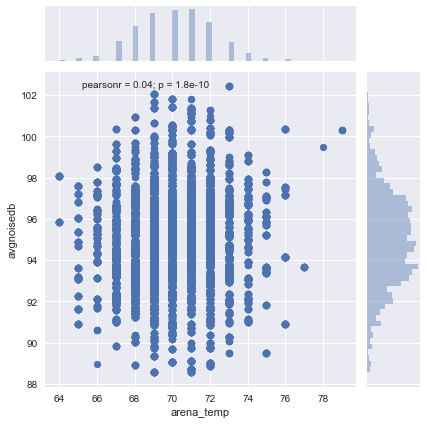

In [13]:
sns.jointplot(x= 'arena_temp', y = 'avgnoisedb', data=kobe_train)

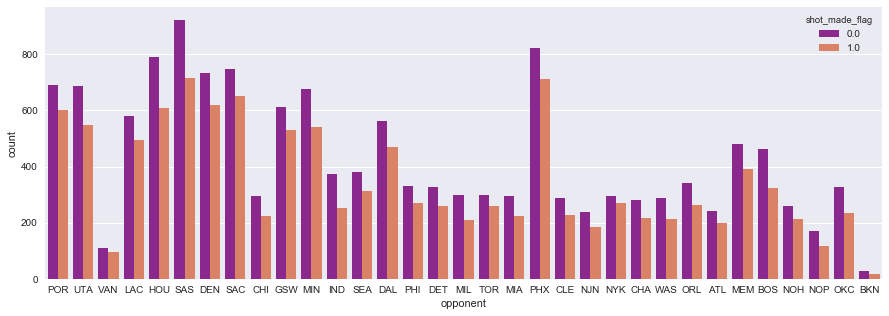

In [14]:
# Kobes score / no score trend(count) aganist each teams

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train['opponent'], hue = kobe_train['shot_made_flag'], palette='plasma')

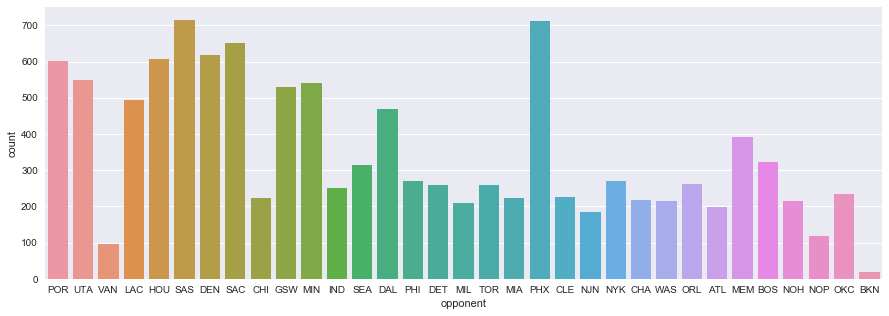

In [158]:
# No of times Kobe scored when played with each team

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[kobe_train['shot_made_flag']==1]['opponent'])

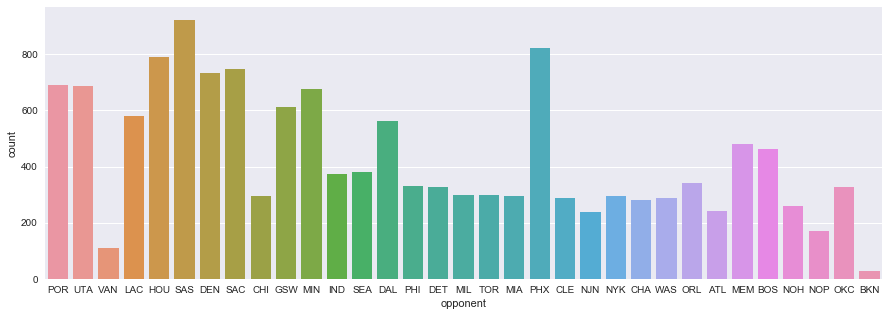

In [159]:
# No of times Kobe did not score when played with each team

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[kobe_train['shot_made_flag']==0]['opponent'])

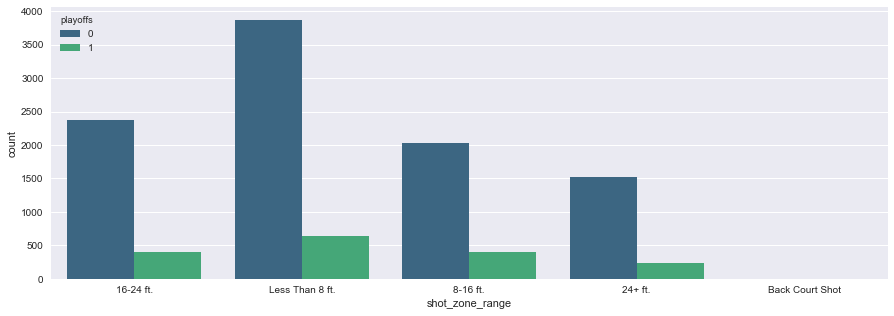

In [15]:
# Kobes shot range and scoring trend in playoffs

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train[kobe_train['shot_made_flag']== 1]['shot_zone_range'], 
              hue = kobe_train['playoffs'],palette='viridis')

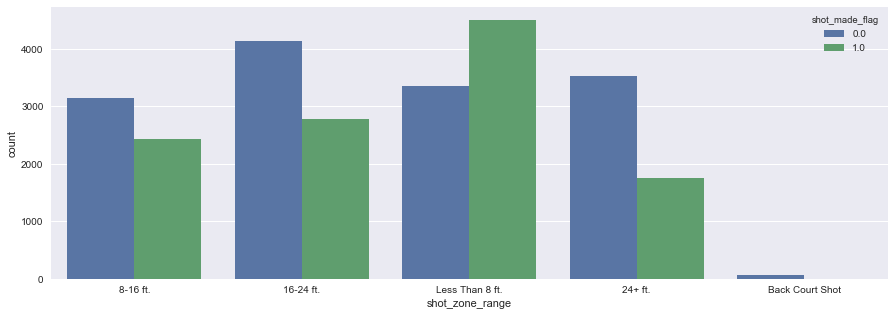

In [16]:
# Kobes shot range and score or no score count both (0 & 1)

plt.figure(figsize=(15,5))
sns.countplot(x=kobe_train['shot_zone_range'], hue = kobe_train['shot_made_flag'])

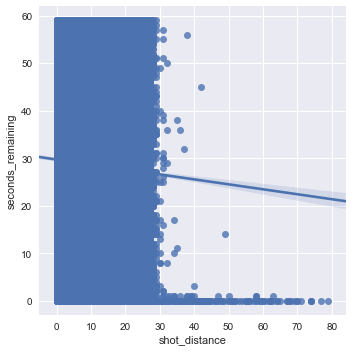

In [17]:
plt.figure(figsize=(40,5))

sns.lmplot(data = kobe_train, x='shot_distance', y ='seconds_remaining')


In [18]:
kobe_train['shot_made_flag'].unique()

array([ 0.,  1.])

In [19]:
np.nan

nan

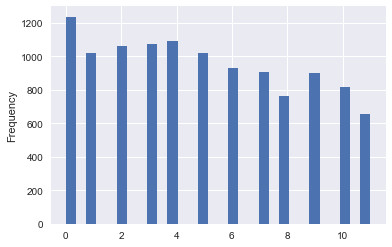

In [20]:
kobe_train[kobe_train['shot_made_flag']== 1]['minutes_remaining'].plot.hist(bins = 30)

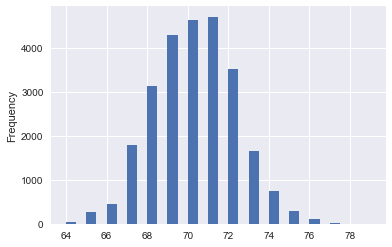

In [23]:
kobe_train['arena_temp'].plot.hist(bins = 30)

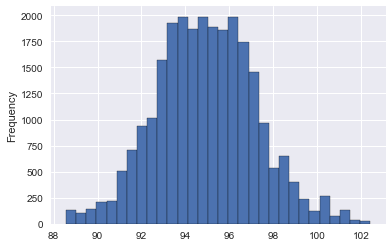

In [21]:
kobe_train['avgnoisedb'].plot.hist(bins = 30, ec='black')

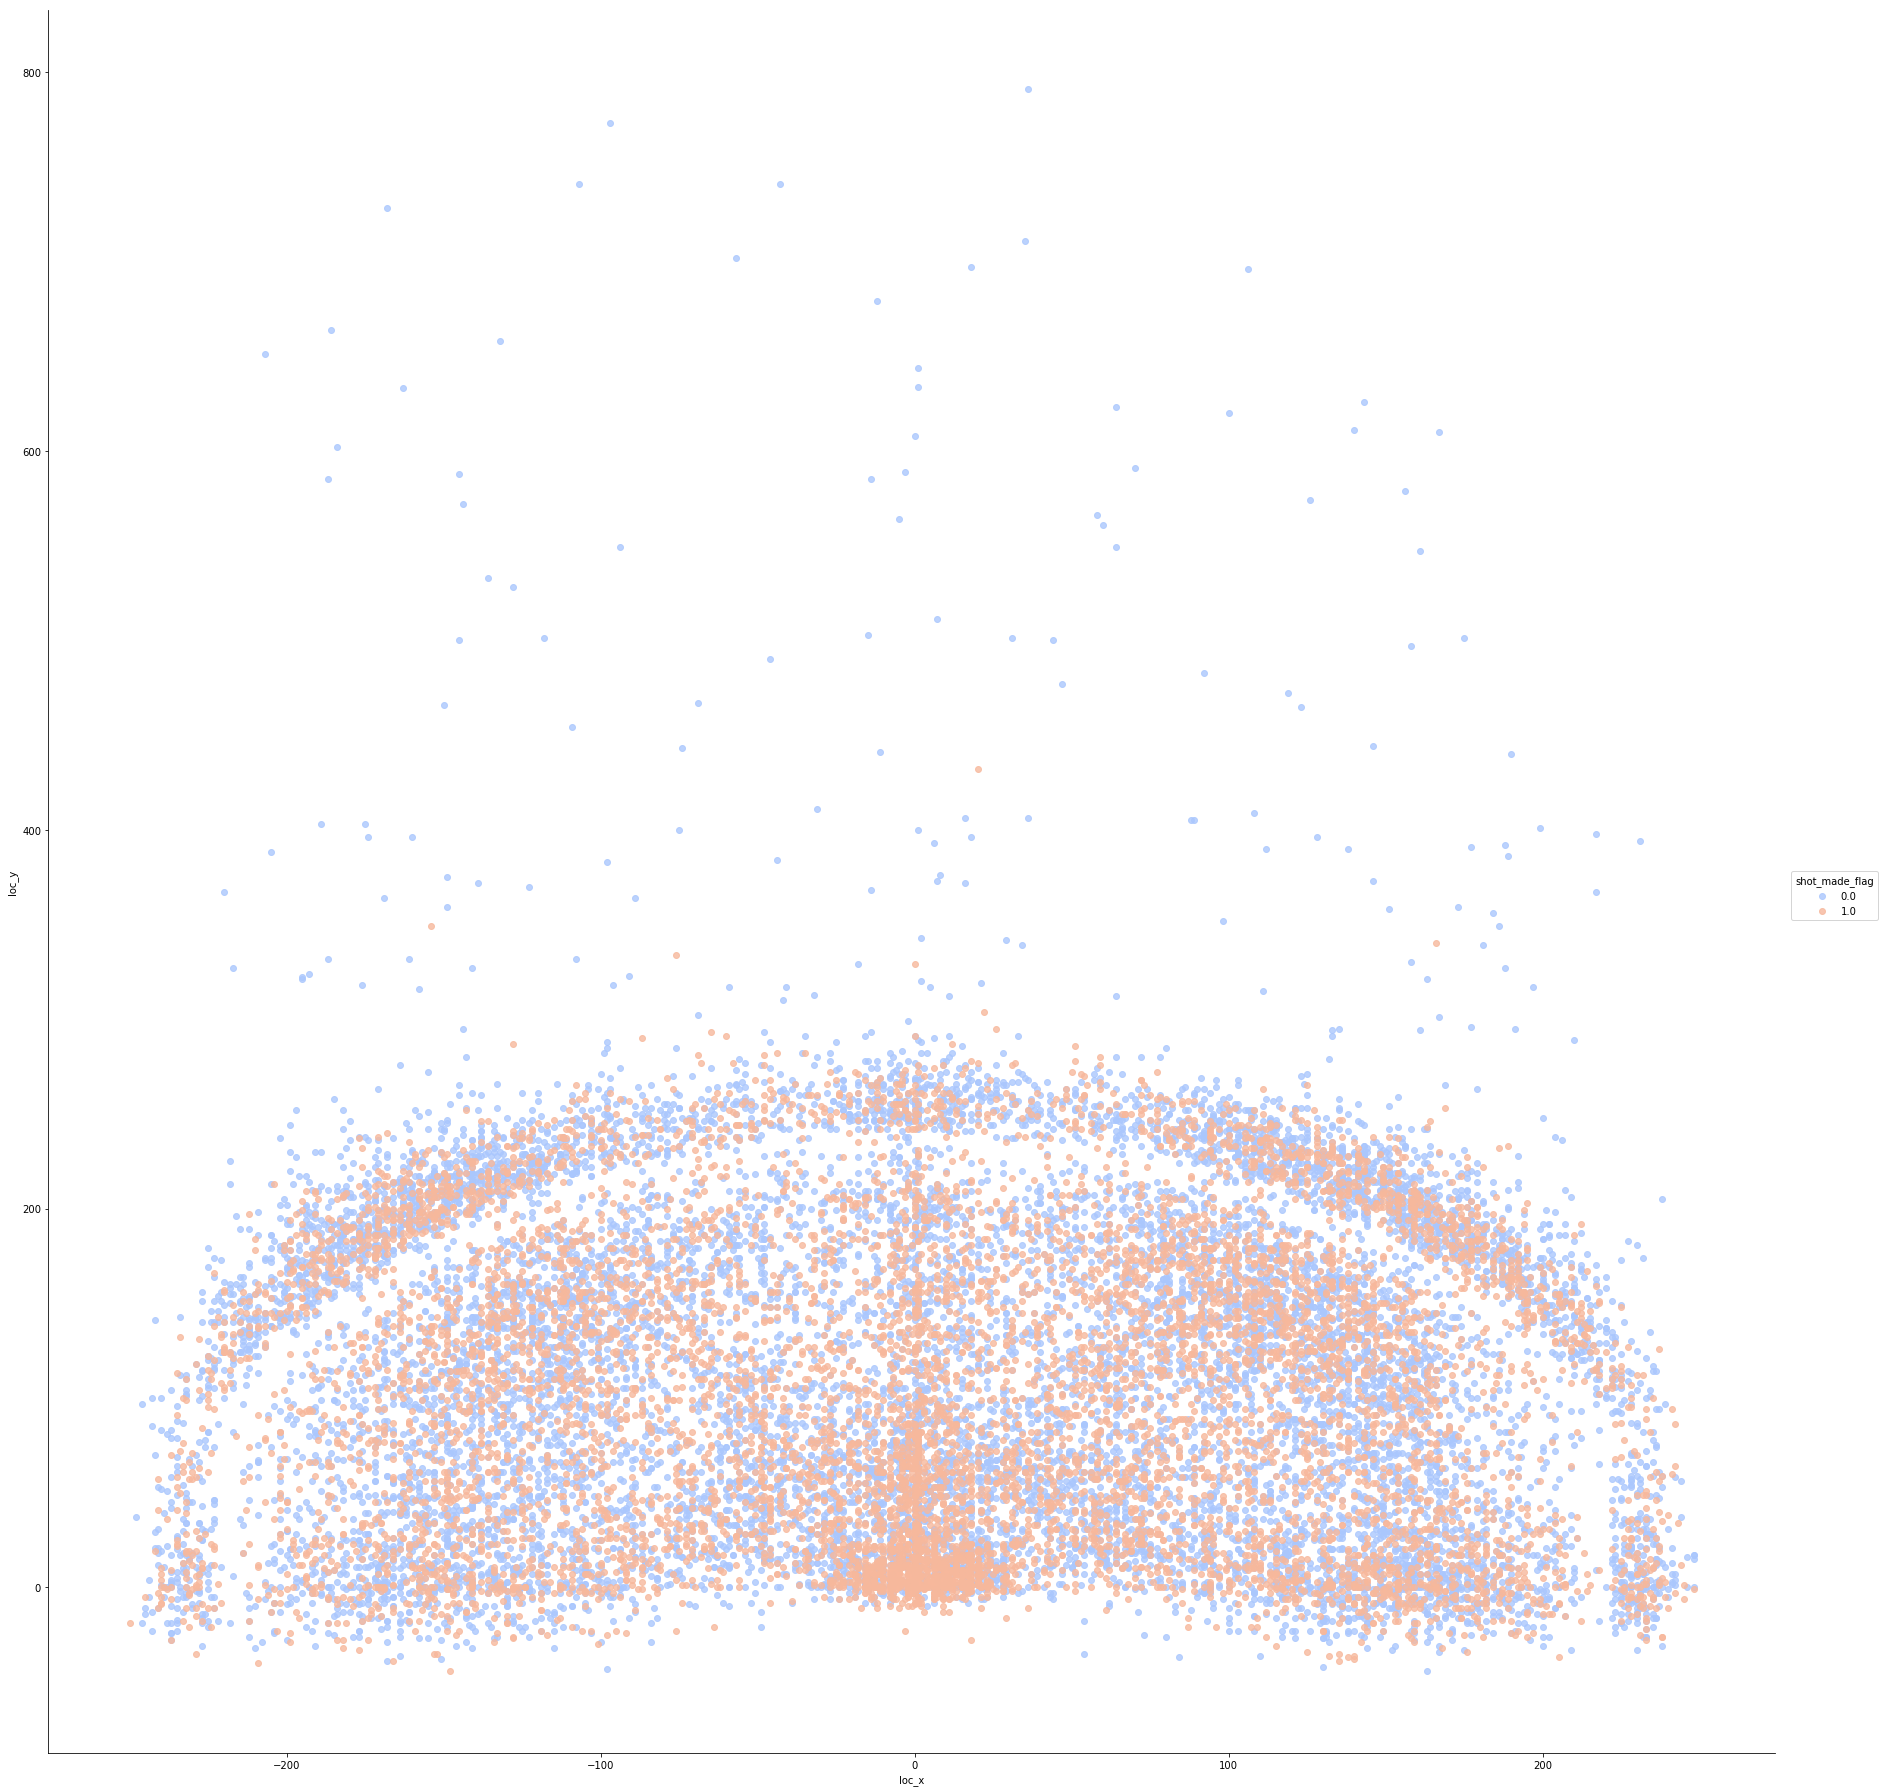

In [138]:
plt.figure(figsize=(45,5))
#plt.scatter(kobe_train['loc_x'], kobe_train['loc_y'],)

sns.lmplot('loc_x', 'loc_y',kobe_train, hue='shot_made_flag', fit_reg=False,size=25, palette='coolwarm' )

### Get Dummies for the Categorical Values

In [29]:
# Deal with categorical values in train data

action_type_dmy = pd.get_dummies(kobe_train['action_type'], drop_first=True)
combined_shot_type_dmy = pd.get_dummies(kobe_train['combined_shot_type'], drop_first=True)
shot_type_dmy = pd.get_dummies(kobe_train['shot_type'], drop_first=True)
shot_zone_area_dmy = pd.get_dummies(kobe_train['shot_zone_area'], drop_first=True)
shot_zone_basic_dmy = pd.get_dummies(kobe_train['shot_zone_basic'], drop_first=True)
shot_zone_range_dmy = pd.get_dummies(kobe_train['shot_zone_range'], drop_first=True)
team_name_dmy = pd.get_dummies(kobe_train['team_name'], drop_first=True)
matchup_dmy = pd.get_dummies(kobe_train['matchup'], drop_first=True)
opponent_dmy = pd.get_dummies(kobe_train['opponent'], drop_first=True)
season_dmy = pd.get_dummies(kobe_train['season'], drop_first=True)


In [25]:
# Deal with categorical values in test data

action_type_dmytst = pd.get_dummies(kobe_test['action_type'], drop_first=True)
combined_shot_type_dmytst = pd.get_dummies(kobe_test['combined_shot_type'], drop_first=True)
shot_type_dmytst = pd.get_dummies(kobe_test['shot_type'], drop_first=True)
shot_zone_area_dmytst = pd.get_dummies(kobe_test['shot_zone_area'], drop_first=True)
shot_zone_basic_dmytst = pd.get_dummies(kobe_test['shot_zone_basic'], drop_first=True)
shot_zone_range_dmytst = pd.get_dummies(kobe_test['shot_zone_range'], drop_first=True)
team_name_dmytst = pd.get_dummies(kobe_test['team_name'], drop_first=True)
matchup_dmytst = pd.get_dummies(kobe_test['matchup'], drop_first=True)
opponent_dmytst = pd.get_dummies(kobe_test['opponent'], drop_first=True)
season_dmytst = pd.get_dummies(kobe_test['season'], drop_first=True)

In [ ]:
# Concatenate the Dummy variables to the traning DF

In [30]:
kobe_train = pd.concat([kobe_train,action_type_dmy,combined_shot_type_dmy,shot_type_dmy,shot_zone_area_dmy,
                        shot_zone_basic_dmy,shot_zone_range_dmy,team_name_dmy,matchup_dmy,opponent_dmy,season_dmy], 
                        axis = 1 )

In [ ]:
# Concatenate the Dummy variables to the testing DF

In [26]:
kobe_test = pd.concat([kobe_test,action_type_dmytst,combined_shot_type_dmytst,shot_type_dmytst,shot_zone_area_dmytst,
                       shot_zone_basic_dmytst,shot_zone_range_dmytst,team_name_dmytst,matchup_dmytst,
                       opponent_dmytst,season_dmytst], 
                       axis = 1 )

In [31]:
#kobe_train.head()
kobe_train.info()
#kobe_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 0 to 30691
Columns: 227 entries, action_type to 2015-16
dtypes: float64(4), int64(13), object(11), uint8(199)
memory usage: 11.8+ MB


In [28]:
kobe_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9 to 30696
Columns: 221 entries, action_type to 2015-16
dtypes: float64(4), int64(13), object(11), uint8(193)
memory usage: 2.0+ MB


In [32]:
# Drop the categorical variables existing in the train DF, Included date 'game_date' to drop for now, need review this.

train = kobe_train.drop(['action_type','combined_shot_type','shot_type','shot_zone_area','shot_zone_basic',
                         'shot_zone_range','team_name','matchup','opponent','game_date','season'], axis = 1 )

In [33]:
train.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,12,20000012,34.0443,-157,0,-118.4268,10,1,0,22,...,0,0,0,0,0,0,0,0,0,0
1,35,20000012,33.9093,-101,135,-118.3708,7,1,0,45,...,0,0,0,0,0,0,0,0,0,0
2,43,20000012,33.8693,138,175,-118.1318,6,1,0,52,...,0,0,0,0,0,0,0,0,0,0
3,155,20000012,34.0443,0,0,-118.2698,6,2,0,19,...,0,0,0,0,0,0,0,0,0,0
4,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,32,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Drop the categorical variables existing in the test DF, Included date 'game_date' to drop for now, need review this.

test = kobe_test.drop(['action_type','combined_shot_type','shot_type','shot_zone_area','shot_zone_basic',
                         'shot_zone_range','team_name','matchup','opponent','game_date','season'], axis = 1 )

In [35]:
test.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
9,10,20000012,33.9723,167,72,-118.1028,10,1,0,27,...,0,0,0,0,0,0,0,0,0,0
10,254,20000012,34.0163,1,28,-118.2688,8,3,0,5,...,0,0,0,0,0,0,0,0,0,0
30,100,20000019,34.0443,0,0,-118.2698,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
31,249,20000019,34.0443,0,0,-118.2698,10,3,0,46,...,0,0,0,0,0,0,0,0,0,0
44,4,20000047,33.9683,163,76,-118.1068,11,1,0,26,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test.isnull().count()

game_event_id                     5000
game_id                           5000
lat                               5000
loc_x                             5000
loc_y                             5000
lon                               5000
minutes_remaining                 5000
period                            5000
playoffs                          5000
seconds_remaining                 5000
shot_distance                     5000
shot_made_flag                    5000
team_id                           5000
shot_id                           5000
attendance                        5000
arena_temp                        5000
avgnoisedb                        5000
Alley Oop Layup shot              5000
Cutting Finger Roll Layup Shot    5000
Driving Bank shot                 5000
Driving Dunk Shot                 5000
Driving Finger Roll Layup Shot    5000
Driving Finger Roll Shot          5000
Driving Floating Jump Shot        5000
Driving Hook Shot                 5000
Driving Jump shot        

In [137]:
# Try Log -- did not work

#logTrain = np.log(train)

#------------------------------------Use StandardScaler on the raw data

### Use StandardScaler on the Raw Data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scalar = StandardScaler()
scalar.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
scaled_data = scalar.transform(train)

In [41]:
scaled_data_df = pd.DataFrame(scaled_data, columns = train.columns)

In [42]:
scaled_data_df.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,-1.584695,-0.612704,1.035246,-1.491296,-1.035246,-1.491296,1.481054,-1.320593,-0.413876,-0.360186,...,-0.255871,-0.276005,-0.278609,-0.272148,-0.250826,-0.24149,-0.233443,-0.047972,-0.153694,-0.193994
1,-1.431132,-0.612704,-0.496228,-0.982533,0.496228,-0.982533,0.612096,-1.320593,-0.413876,0.952371,...,-0.255871,-0.276005,-0.278609,-0.272148,-0.250826,-0.24149,-0.233443,-0.047972,-0.153694,-0.193994
2,-1.377719,-0.612704,-0.949998,1.188792,0.949998,1.188792,0.322443,-1.320593,-0.413876,1.351845,...,-0.255871,-0.276005,-0.278609,-0.272148,-0.250826,-0.24149,-0.233443,-0.047972,-0.153694,-0.193994
3,-0.629934,-0.612704,1.035246,-0.064944,-1.035246,-0.064944,0.322443,-0.452239,-0.413876,-0.531389,...,-0.255871,-0.276005,-0.278609,-0.272148,-0.250826,-0.24149,-0.233443,-0.047972,-0.153694,-0.193994
4,-0.035711,-0.612704,1.160033,-1.382275,-1.160033,-1.382275,1.191401,0.416115,-0.413876,0.210491,...,-0.255871,-0.276005,-0.278609,-0.272148,-0.250826,-0.24149,-0.233443,-0.047972,-0.153694,-0.193994


In [111]:
scaled_data_df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
count,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,...,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04,2.569700e+04
mean,-7.923684e-17,-6.904026e-15,2.140005e-14,-6.087552e-17,3.668074e-16,3.267953e-14,-1.041087e-15,5.746529e-16,4.455291e-14,-2.091524e-17,...,-4.149238e-14,1.945578e-14,-2.952928e-14,1.162557e-14,4.145249e-14,-2.027197e-15,-5.232201e-14,-2.558975e-15,-2.706645e-14,-4.689599e-14
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.651462e+00,-6.127042e-01,-7.938055e+00,-2.336205e+00,-1.534393e+00,-2.336205e+00,-1.415475e+00,-1.320593e+00,-4.138757e-01,-1.615675e+00,...,-2.558706e-01,-2.760053e-01,-2.786092e-01,-2.721485e-01,-2.508259e-01,-2.414895e-01,-2.334426e-01,-4.797157e-02,-1.536936e-01,-1.939942e-01
25%,-9.237064e-01,-5.480809e-01,-7.798338e-01,-6.736417e-01,-9.898691e-01,-6.736417e-01,-8.361688e-01,-1.320593e+00,-4.138757e-01,-8.737950e-01,...,-2.558706e-01,-2.760053e-01,-2.786092e-01,-2.721485e-01,-2.508259e-01,-2.414895e-01,-2.334426e-01,-4.797157e-02,-1.536936e-01,-1.939942e-01
50%,2.437861e-02,-4.963524e-01,1.957716e-01,-6.494373e-02,-1.957716e-01,-6.494373e-02,3.278983e-02,4.161153e-01,-4.138757e-01,-1.777966e-02,...,-2.558706e-01,-2.760053e-01,-2.786092e-01,-2.721485e-01,-2.508259e-01,-2.414895e-01,-2.334426e-01,-4.797157e-02,-1.536936e-01,-1.939942e-01
75%,7.855172e-01,6.279667e-01,9.898691e-01,7.890505e-01,7.798338e-01,7.890505e-01,9.017485e-01,4.161153e-01,-4.138757e-01,8.382357e-01,...,-2.558706e-01,-2.760053e-01,-2.786092e-01,-2.721485e-01,-2.508259e-01,-2.414895e-01,-2.334426e-01,-4.797157e-02,-1.536936e-01,-1.939942e-01
max,2.695040e+00,3.251375e+00,1.534393e+00,2.188147e+00,7.938055e+00,2.188147e+00,1.770707e+00,3.889532e+00,2.416184e+00,1.751319e+00,...,3.908225e+00,3.623119e+00,3.589257e+00,3.674465e+00,3.986829e+00,4.140966e+00,4.283708e+00,2.084568e+01,6.506450e+00,5.154793e+00


In [48]:
# Scale the test DF

scalarTest = StandardScaler()
scalarTest.fit(test.drop(['shot_made_flag'], axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_data_test = scalarTest.transform(test.drop(['shot_made_flag'], axis =1))

In [56]:
scaled_data_test_df = pd.DataFrame(scaled_data_test, 
                                   columns = pd.DataFrame(test.drop(['shot_made_flag'], axis =1).columns))

In [57]:
scaled_data_test_df.head()

,"(game_event_id,)","(game_id,)","(lat,)","(loc_x,)","(loc_y,)","(lon,)","(minutes_remaining,)","(period,)","(playoffs,)","(seconds_remaining,)",...,"(2006-07,)","(2007-08,)","(2008-09,)","(2009-10,)","(2010-11,)","(2011-12,)","(2012-13,)","(2013-14,)","(2014-15,)","(2015-16,)"
0,-1.577072,-0.622623,0.213453,1.450193,-0.213453,1.450193,1.489956,-1.299241,-0.417114,-0.095105,...,-0.25621,-0.267547,-0.291263,-0.25621,-0.254433,-0.215044,-0.236572,-0.052989,-0.156813,-0.193803
1,0.037185,-0.622623,0.725620,-0.053589,-0.725620,-0.053589,0.907987,0.418877,-0.417114,-1.370754,...,-0.25621,-0.267547,-0.291263,-0.25621,-0.254433,-0.215044,-0.236572,-0.052989,-0.156813,-0.193803
2,-0.981650,-0.622622,1.051545,-0.062648,-1.051545,-0.062648,-1.419887,-1.299241,-0.417114,-1.602691,...,-0.25621,-0.267547,-0.291263,-0.25621,-0.254433,-0.215044,-0.236572,-0.052989,-0.156813,-0.193803
3,0.004106,-0.622622,1.051545,-0.062648,-1.051545,-0.062648,1.489956,0.418877,-0.417114,1.006591,...,-0.25621,-0.267547,-0.291263,-0.25621,-0.254433,-0.215044,-0.236572,-0.052989,-0.156813,-0.193803
4,-1.616767,-0.622618,0.166892,1.413958,-0.166892,1.413958,1.780940,-1.299241,-0.417114,-0.153089,...,-0.25621,-0.267547,-0.291263,-0.25621,-0.254433,-0.215044,-0.236572,-0.052989,-0.156813,-0.193803


In [58]:
scaled_data_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 209 entries, (game_event_id,) to (2015-16,)
dtypes: float64(209)
memory usage: 8.0 MB


### After Standardising Encode the Data

In [59]:
#from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder

In [67]:
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(scaled_data_df)
# Encode train data
scaled_data_encod_df = scaled_data_df.apply(LabelEncoder().fit_transform)

In [68]:
scaled_data_encod_df.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,10,0,402,87,43,87,10,0,0,22,...,0,0,0,0,0,0,0,0,0,0
1,33,0,267,143,178,143,7,0,0,45,...,0,0,0,0,0,0,0,0,0,0
2,41,0,227,381,218,381,6,0,0,52,...,0,0,0,0,0,0,0,0,0,0
3,153,0,402,243,43,243,6,1,0,19,...,0,0,0,0,0,0,0,0,0,0
4,242,0,413,99,32,99,9,2,0,32,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = scaled_data_encod_df.drop(['shot_made_flag'], axis = 1)

In [70]:
y = scaled_data_encod_df['shot_made_flag']

In [71]:
# Encode test data

scaled_data_test_encod_df = scaled_data_test_df.apply(LabelEncoder().fit_transform)

In [72]:
scaled_data_test_encod_df.head()

,"(game_event_id,)","(game_id,)","(lat,)","(loc_x,)","(loc_y,)","(lon,)","(minutes_remaining,)","(period,)","(playoffs,)","(seconds_remaining,)",...,"(2006-07,)","(2007-08,)","(2008-09,)","(2009-10,)","(2010-11,)","(2011-12,)","(2012-13,)","(2013-14,)","(2014-15,)","(2015-16,)"
0,8,0,220,395,101,395,10,0,0,27,...,0,0,0,0,0,0,0,0,0,0
1,252,0,262,230,59,230,8,2,0,5,...,0,0,0,0,0,0,0,0,0,0
2,98,1,289,229,32,229,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,247,1,289,229,32,229,10,2,0,46,...,0,0,0,0,0,0,0,0,0,0
4,2,2,217,391,104,391,11,0,0,26,...,0,0,0,0,0,0,0,0,0,0


## Train the Logistic Regression Model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
logismodel = LogisticRegression()

In [76]:
logismodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
# Predictions and Evaluations

In [78]:
predictions = logismodel.predict(X_test)

In [79]:
predictions

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.86      0.67      0.75      5525
          1       0.46      0.72      0.56      2185

avg / total       0.74      0.68      0.70      7710



In [82]:
print(confusion_matrix(predictions, y_test))

[[3679 1846]
 [ 617 1568]]


In [83]:
from sklearn.metrics import precision_recall_fscore_support


In [84]:
precision_recall_fscore_support(y_test, predictions, average='binary', pos_label = 1)

(0.71762013729977114, 0.45928529584065614, 0.56010001786033226, None)

# PCA Analysis

In [1]:
#--------Try PCA-------------------------------------------

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scalar = StandardScaler()
scalar.fit(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
scaled_data = scalar.transform(train)

In [100]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components = 5)

In [55]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
x_pca = pca.transform(scaled_data)

In [58]:
x_pca.shape

(25697, 5)

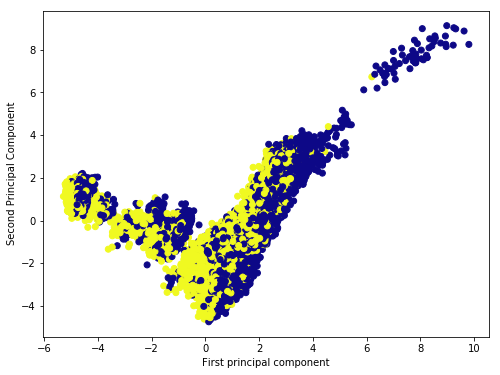

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train['shot_made_flag'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
x_pca_df.hist(column= 0, by=4)

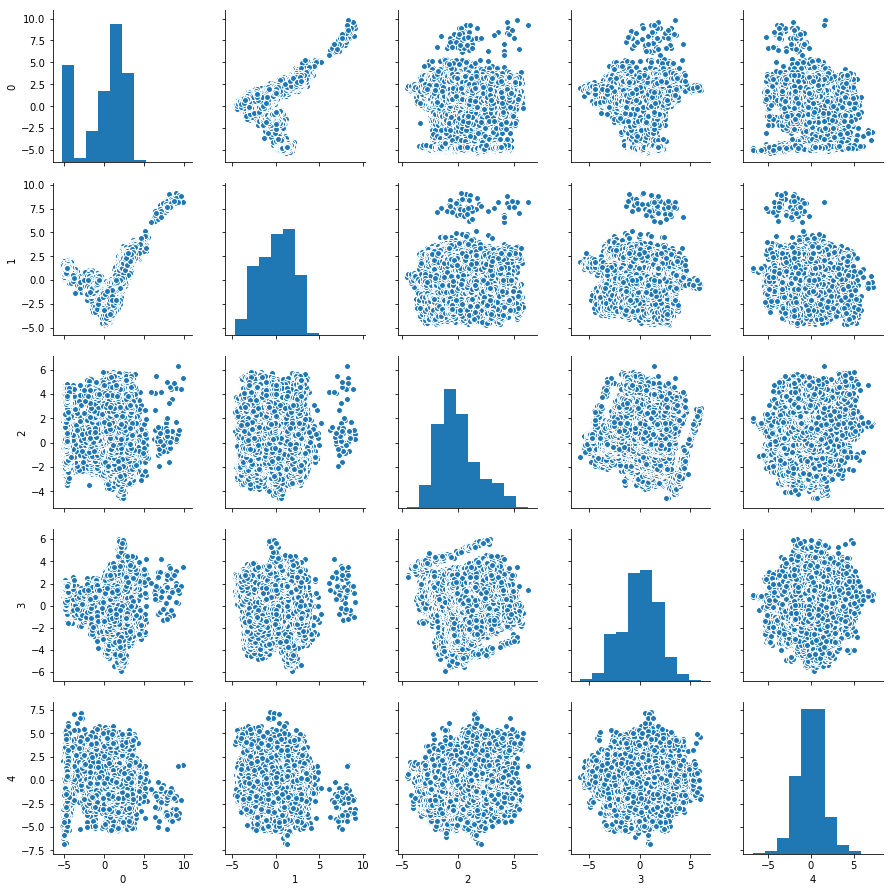

In [79]:
x_pca_df = pd.DataFrame(x_pca)
sns.pairplot(x_pca_df)

In [80]:
x_pca_df.head()

,0,1,2,3,4
0,0.694526,-2.602214,-0.318493,-3.403042,-2.090038
1,1.551225,-0.081011,-0.558713,-2.323035,-2.259567
2,2.256745,-0.470169,-1.961897,1.334870,-2.076142
3,-4.765045,1.055521,-1.345841,-0.408643,-2.681234
4,0.654254,-2.422024,-0.301695,-3.367749,-1.830386


In [67]:
# Heat MAp---------------

In [68]:
df_comp = pd.DataFrame(pca.components_,columns=train.columns)

In [69]:
df_comp.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16
0,0.021175,-0.008685,-0.268951,0.013857,0.268951,0.013857,-0.015586,0.017442,-0.001818,-0.014791,...,0.006016,0.001130,0.005902,0.001755,0.007619,0.011318,0.000234,0.000325,0.013364,0.030492
1,0.090609,-0.032076,-0.226814,-0.100738,0.226814,-0.100738,-0.085226,0.070485,-0.036545,-0.031308,...,0.014191,0.020645,-0.008081,-0.016613,-0.010117,-0.014585,0.018501,-0.000898,0.006175,0.026696
2,0.022443,0.449343,-0.023496,-0.200786,0.023496,-0.200786,-0.005518,0.018970,0.411340,-0.005987,...,-0.067643,0.012447,0.046759,0.071954,0.008627,0.060837,-0.024919,-0.010686,-0.013225,-0.009923
3,-0.016956,0.175971,-0.031113,0.499832,0.031113,0.499832,-0.009191,-0.021403,0.162503,-0.006493,...,-0.013556,0.038386,0.010457,0.007601,-0.018358,0.003266,0.000367,-0.000859,-0.000244,0.011988
4,0.088279,-0.072016,0.014884,0.015302,-0.014884,0.015302,-0.041623,0.057207,-0.024871,0.006101,...,-0.011207,0.000657,0.098264,0.125511,0.082716,0.139593,0.108528,0.059634,0.055171,0.092401


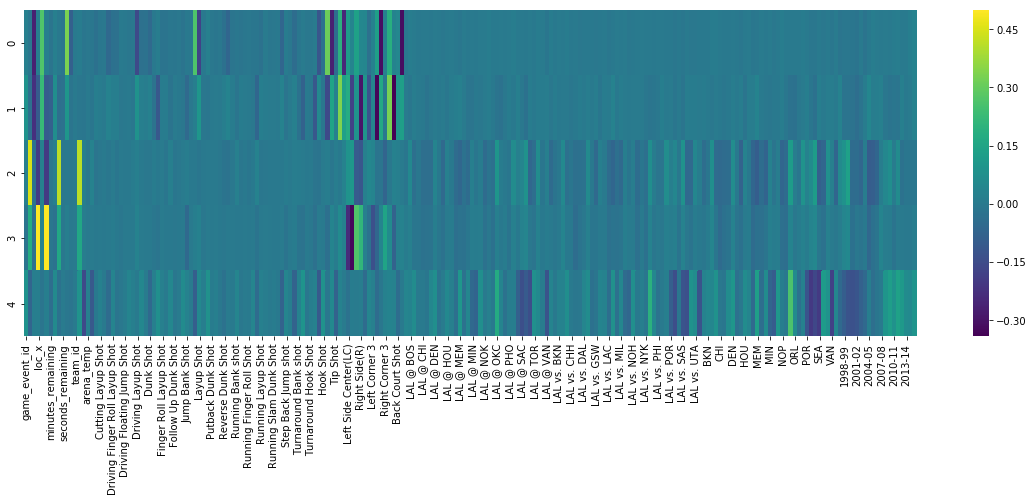

In [73]:
plt.figure(figsize=(20,6))
sns.heatmap(df_comp,cmap='viridis')

## Training Linear Discriminant Analysis Model

In [46]:
# Apply LDA ---- LinearDiscriminantAnalysis--------------

In [47]:
#from sklearn.lda import LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
# Data prep done at top

X = scalarfull_data_encod_df_train.drop(['shot_made_flag'], axis = 1)
y = scalarfull_data_encod_df_train['shot_made_flag']

In [50]:
#X = train.drop(['shot_made_flag'], axis = 1)
#y = train['shot_made_flag']

In [51]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
ldamodel = LinearDiscriminantAnalysis()

In [53]:
ldamodel.fit(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [54]:
predictions_lda = ldamodel.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [56]:
print(classification_report(y_test, predictions_lda))

             precision    recall  f1-score   support

        0.0       0.66      0.86      0.75      4296
        1.0       0.72      0.45      0.56      3414

avg / total       0.69      0.68      0.66      7710



In [57]:
print(confusion_matrix(y_test, predictions_lda))

[[3696  600]
 [1872 1542]]


In [58]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, predictions_lda)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3696  600]
 [1872 1542]]


In [76]:
log_loss_lda = log_loss(y_test, predictions_lda)
print('Log Loss',log_loss(y_test, predictions_lda))
print('\n')
print('AUC',roc_auc_score(y_test, predictions_lda))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y_test, predictions_lda))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y_test, predictions_lda))

Log Loss 11.073973412


AUC 0.656002395656


Sensitivity 0.489228085478
recall_score 0.451669595782


Specificity 0.490514333895


classification_error 0.510059540024
1 - accuracy_score 0.320622568093


### Predict Unknow Data LDA

In [181]:
# Missing values Data to be predicted

y_to_predict = pd.DataFrame(scalarfull_data_encod_df_test.drop(['shot_made_flag'], axis =1))

In [182]:
predictions_lda_final = ldamodel.predict(y_to_predict)

In [183]:
predictions_lda_final.shape

(5000,)

In [184]:
predictions_lda_final_df = pd.DataFrame(columns = ['shot_made_flag' ] )

In [185]:
predictions_lda_final_df.shape

(0, 1)

In [186]:
predictions_lda_final_df['shot_made_flag']= predictions_lda_final

In [187]:
shot_id_lda = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [188]:
shot_id_lda = shot_id_lda.reset_index(drop=True)

In [190]:
#shot_id_lda.head()

In [191]:
predictions_lda_final_df = pd.concat([predictions_lda_final_df, shot_id_lda], axis =1)

In [192]:
predictions_lda_final_df.head()
#predictions_lda_final_df.tail()

,shot_made_flag,shot_id
0,0.0,1
1,0.0,8
2,1.0,17
3,1.0,20
4,0.0,33


In [151]:
predictions_lda_final_df.shape

(5000, 2)

In [152]:
#predictions_lda_final_df.drop( ['shot_id','shot_made_flag'],axis =1, inplace=True)

In [153]:
predictions_lda_final_df.shape

(5000, 2)

### End of Linear Discriminant Analysis

## K Means Clustering Analysis

In [60]:
from sklearn.cluster import KMeans

In [61]:
km = KMeans(n_clusters=2)

In [62]:
# Data prep done at top

X = scalarfull_data_encod_df_train.drop(['shot_made_flag'], axis = 1)
y = scalarfull_data_encod_df_train['shot_made_flag']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
X.tail()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,shot_id
30687,380,1558,413,245,43,245,7,3,1,4,...,0,0,0,0,0,0,0,0,0,30692
30688,395,1558,365,246,91,246,6,3,1,5,...,0,0,0,0,0,0,0,0,0,30693
30689,424,1558,247,111,209,111,3,3,1,28,...,0,0,0,0,0,0,0,0,0,30695
30690,446,1558,149,276,307,276,2,3,1,10,...,0,0,0,0,0,0,0,0,0,30696
30691,469,1558,341,246,115,246,0,3,1,39,...,0,0,0,0,0,0,0,0,0,30697


In [66]:
km.cluster_centers_

array([[  2.42195903e+02,   3.51633198e+02,   3.25001792e+02,
          2.54279093e+02,   1.30998208e+02,   2.54279093e+02,
          4.94500701e+00,   1.52297866e+00,  -5.11535259e-14,
          2.84352703e+01,   1.32833775e+01,   6.52541206e+02,
          6.10951862e+00,   3.63174482e+02,   3.97258140e-03,
          0.00000000e+00,   7.08526120e-17,   1.55787506e-04,
          1.09830192e-02,   1.79155632e-03,   4.20626266e-03,
          6.90501259e-18,   3.54263060e-17,   3.11575012e-04,
          1.55787506e-04,   5.95887210e-02,   1.94734382e-03,
          1.63576881e-03,   9.50303786e-03,   8.56831282e-04,
          2.89764761e-02,   9.34725035e-04,   1.71366256e-03,
          1.79155632e-03,   7.78937529e-04,   2.33681259e-04,
          2.10313133e-03,   1.21514255e-02,   5.45256270e-04,
          6.25331048e-01,   9.09799034e-02,   7.78937529e-05,
          4.59573142e-03,   7.78937529e-05,   2.33681259e-04,
          1.55787506e-04,   4.12836890e-03,   1.89281820e-02,
        

In [67]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

In [69]:
print(classification_report(y, km.labels_))

             precision    recall  f1-score   support

        0.0       0.54      0.49      0.52     14232
        1.0       0.44      0.49      0.46     11465

avg / total       0.50      0.49      0.49     25697



In [70]:
print(confusion_matrix(y, km.labels_))

[[6981 7251]
 [5856 5609]]


In [71]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y, km.labels_)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[6981 7251]
 [5856 5609]]


In [73]:
log_loss_km = log_loss(y, km.labels_)
print('Log Loss',log_loss(y, km.labels_))
print('\n')
print('AUC',roc_auc_score(y, km.labels_))
print('\n')
sensitivity = TP / float(FN + TP)
print('Sensitivity', sensitivity)
print('recall_score', recall_score(y, km.labels_))
print('\n')
specificity = TN / (TN + FP)
print('Specificity', specificity)
print('\n')
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('classification_error', classification_error)
print('1 - accuracy_score', 1 - accuracy_score(y, km.labels_))

Log Loss 17.6170580258


AUC 0.489871209686


Sensitivity 0.489228085478
recall_score 0.489228085478


Specificity 0.490514333895


classification_error 0.510059540024
1 - accuracy_score 0.510059540024


### Predict on unknown KMeans

In [165]:
y_to_predict = pd.DataFrame(scalarfull_data_encod_df_test.drop(['shot_made_flag'], axis =1))

In [166]:
km.fit(y_to_predict)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [167]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [168]:
predictions_km_final = km.labels_

In [169]:
predictions_km_final_df = pd.DataFrame(columns = ['shot_made_flag' ] )

In [170]:
predictions_km_final_df.shape

(0, 1)

In [171]:
predictions_km_final_df['shot_made_flag' ] = []

In [172]:
predictions_km_final_df['shot_made_flag' ] =  predictions_km_final

In [173]:
shot_id_km = pd.DataFrame(kobe[kobe['shot_made_flag'].isnull()]['shot_id'])

In [174]:
shot_id_km = shot_id_km.reset_index(drop=True)

In [175]:
predictions_km_final_df = pd.concat([predictions_km_final_df, shot_id_km], axis =1)

In [176]:
predictions_km_final_df.head()

,shot_made_flag,shot_id
0,1,1
1,1,8
2,1,17
3,1,20
4,1,33


In [177]:
predictions_km_final_df.shape

(5000, 2)

In [67]:
#predictions_km_final_df.drop(predictions_km_final_df.index,axis=1, inplace=True)

predictions_km_final_df.drop(['shot_id','shot_made_flag'],axis=1, inplace=True)

In [178]:
predictions_km_final_df.shape

(5000, 2)

In [70]:
#predictions_km_final_df.head()

## Comparing all the models

TypeError: object of type 'numpy.float64' has no len()

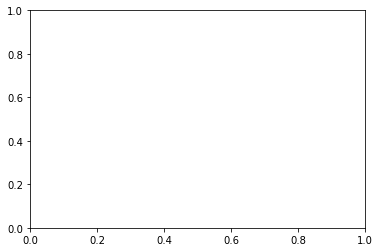

In [114]:
# kde plots
sns.kdeplot(abs(log_loss_logReg), label="Logistic Regression")
#sns.kdeplot(log_loss_lda, label="LDA")
#sns.kdeplot(log_loss_km, label="KMeans Clustering")
#sns.kdeplot(feature_importance[sorted_idx], label="KMeans Clustering")


print(log_loss_km)
print(log_loss_lda)
print(log_loss_logReg)
plt.grid()
plt.legend()

## Assess feature importance

In [106]:
#importances = logismodelfull.coef_

#importances = logismodelfull.feature_importances_
#indices = np.argsort(importances)[::-1]
#feat_label = X.columns

#print(importances)
#print(indices)

#print(np.std(X_train, 0)*importances)
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
 #   print("%d. feature %s (%f)" % (f+1, feat_label[indices[f]], importances[indices[f]]))

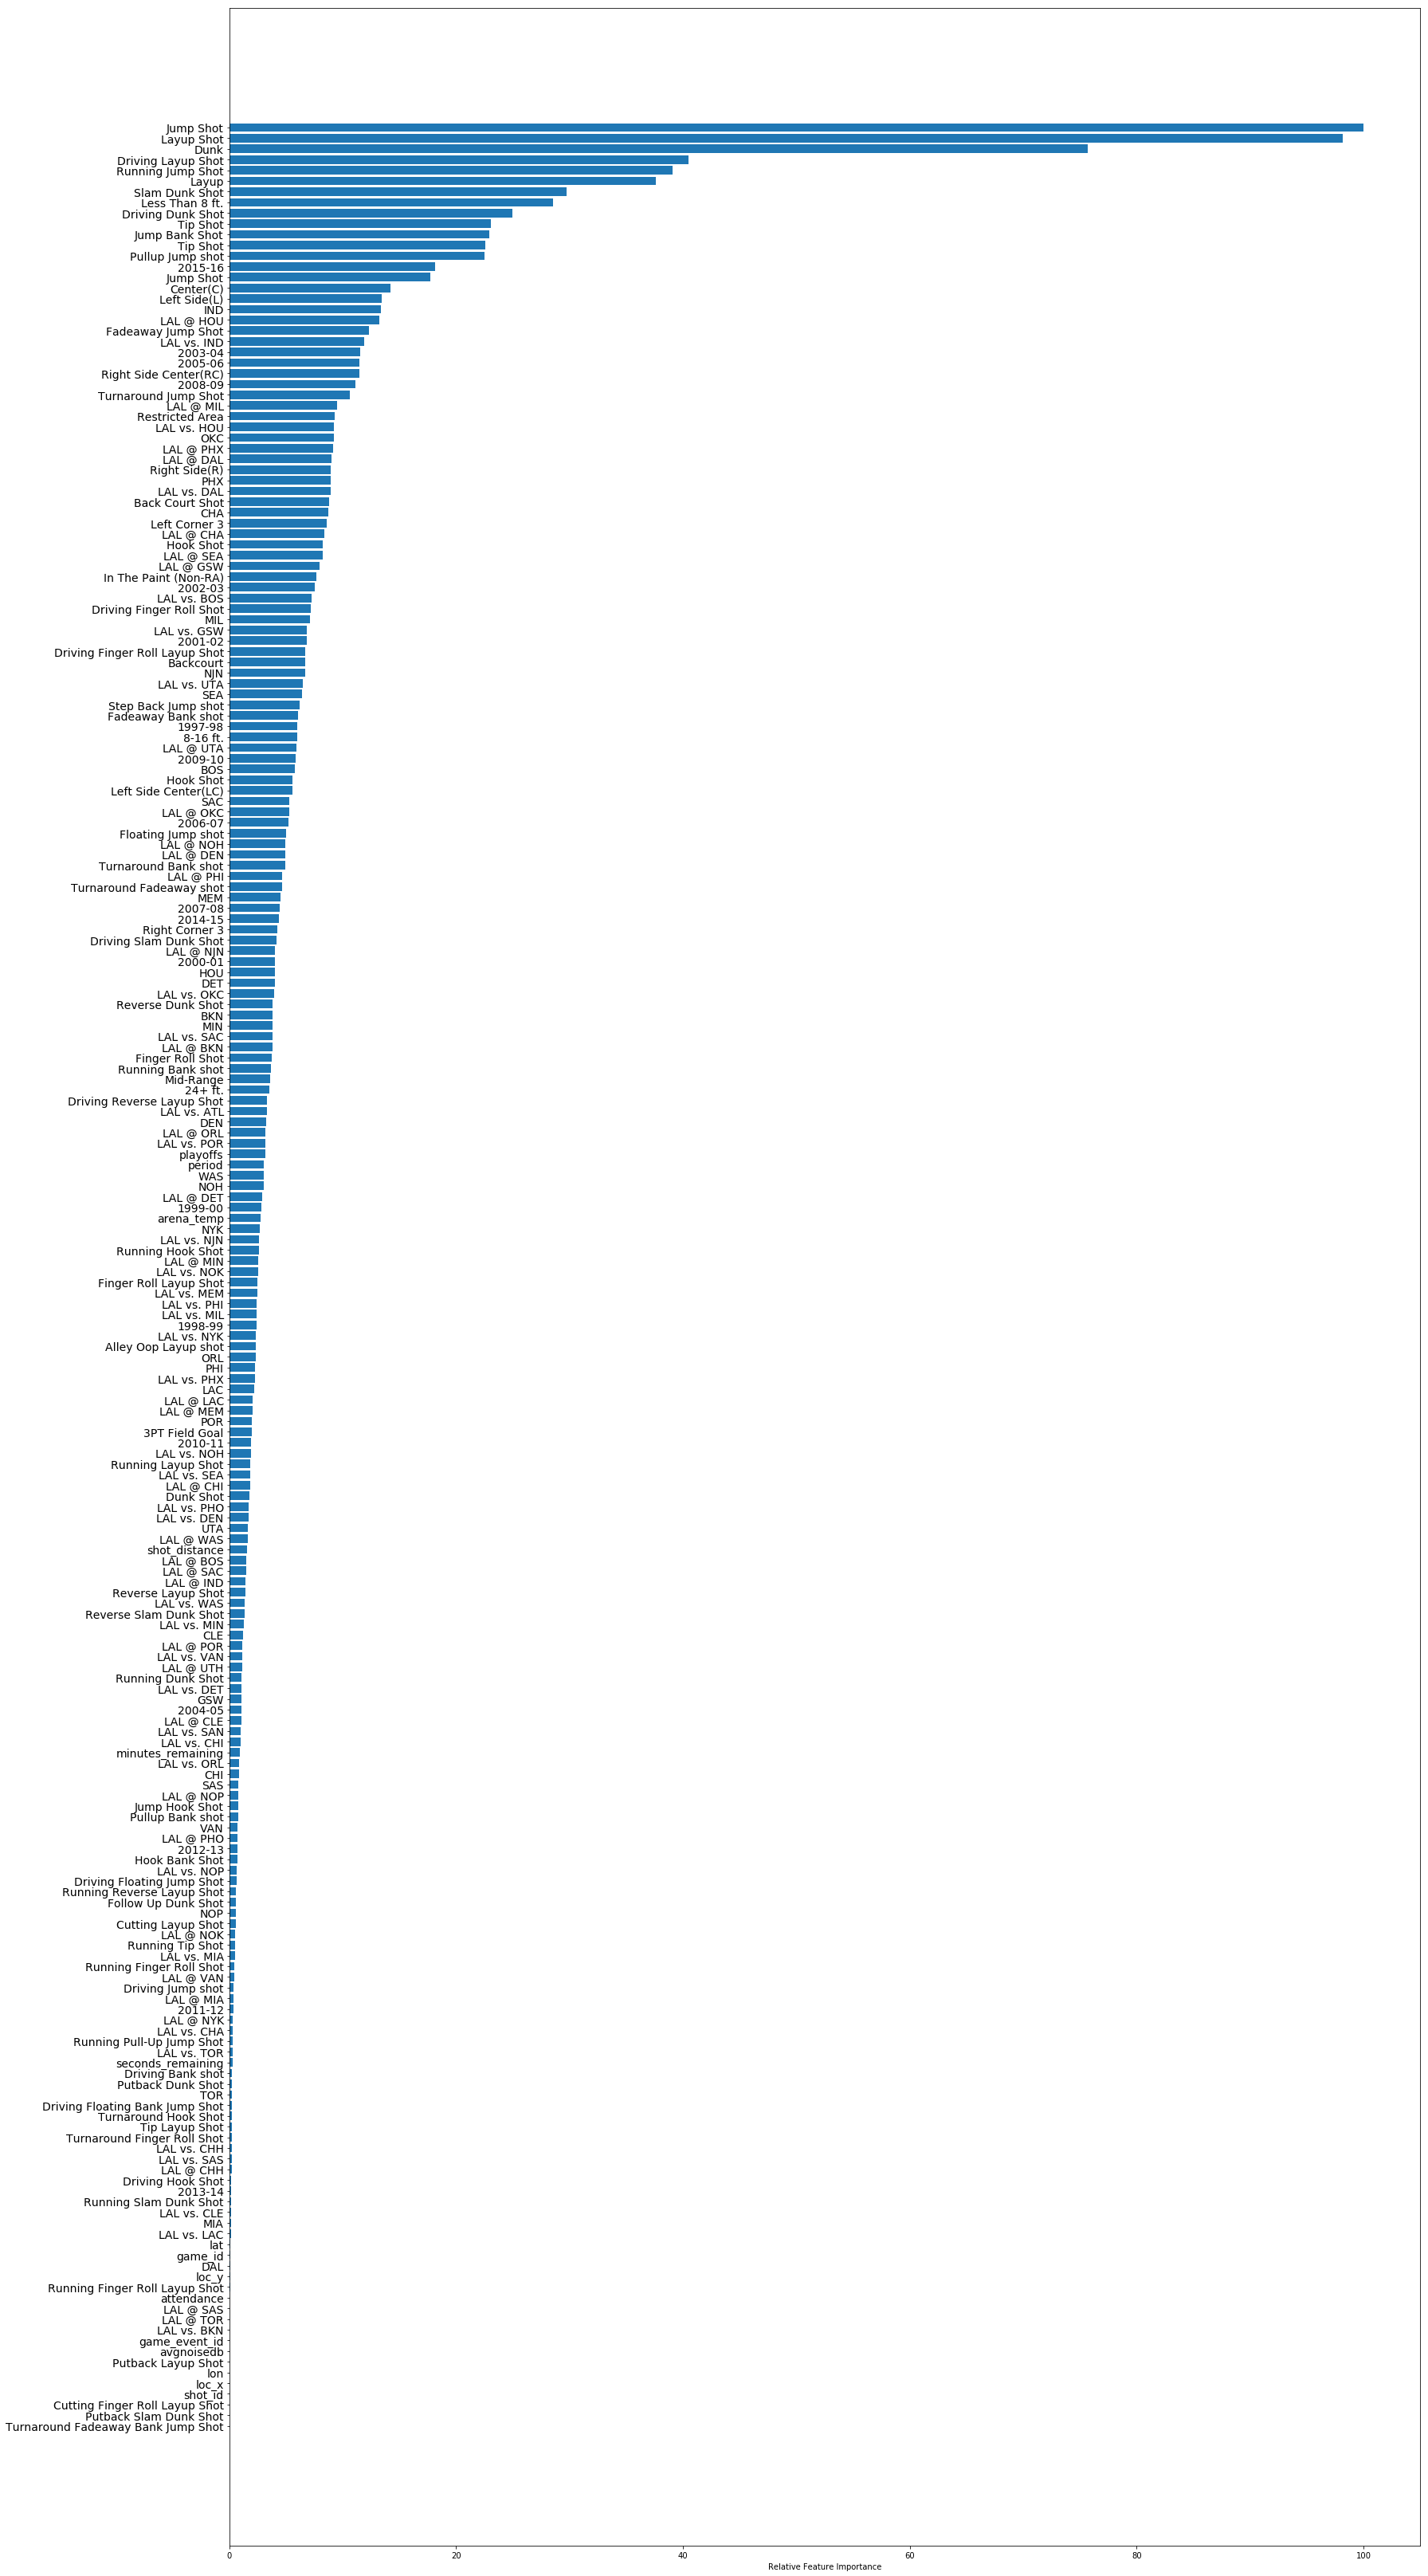

In [110]:
feature_importance = abs(logismodelfull.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(25,45))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()


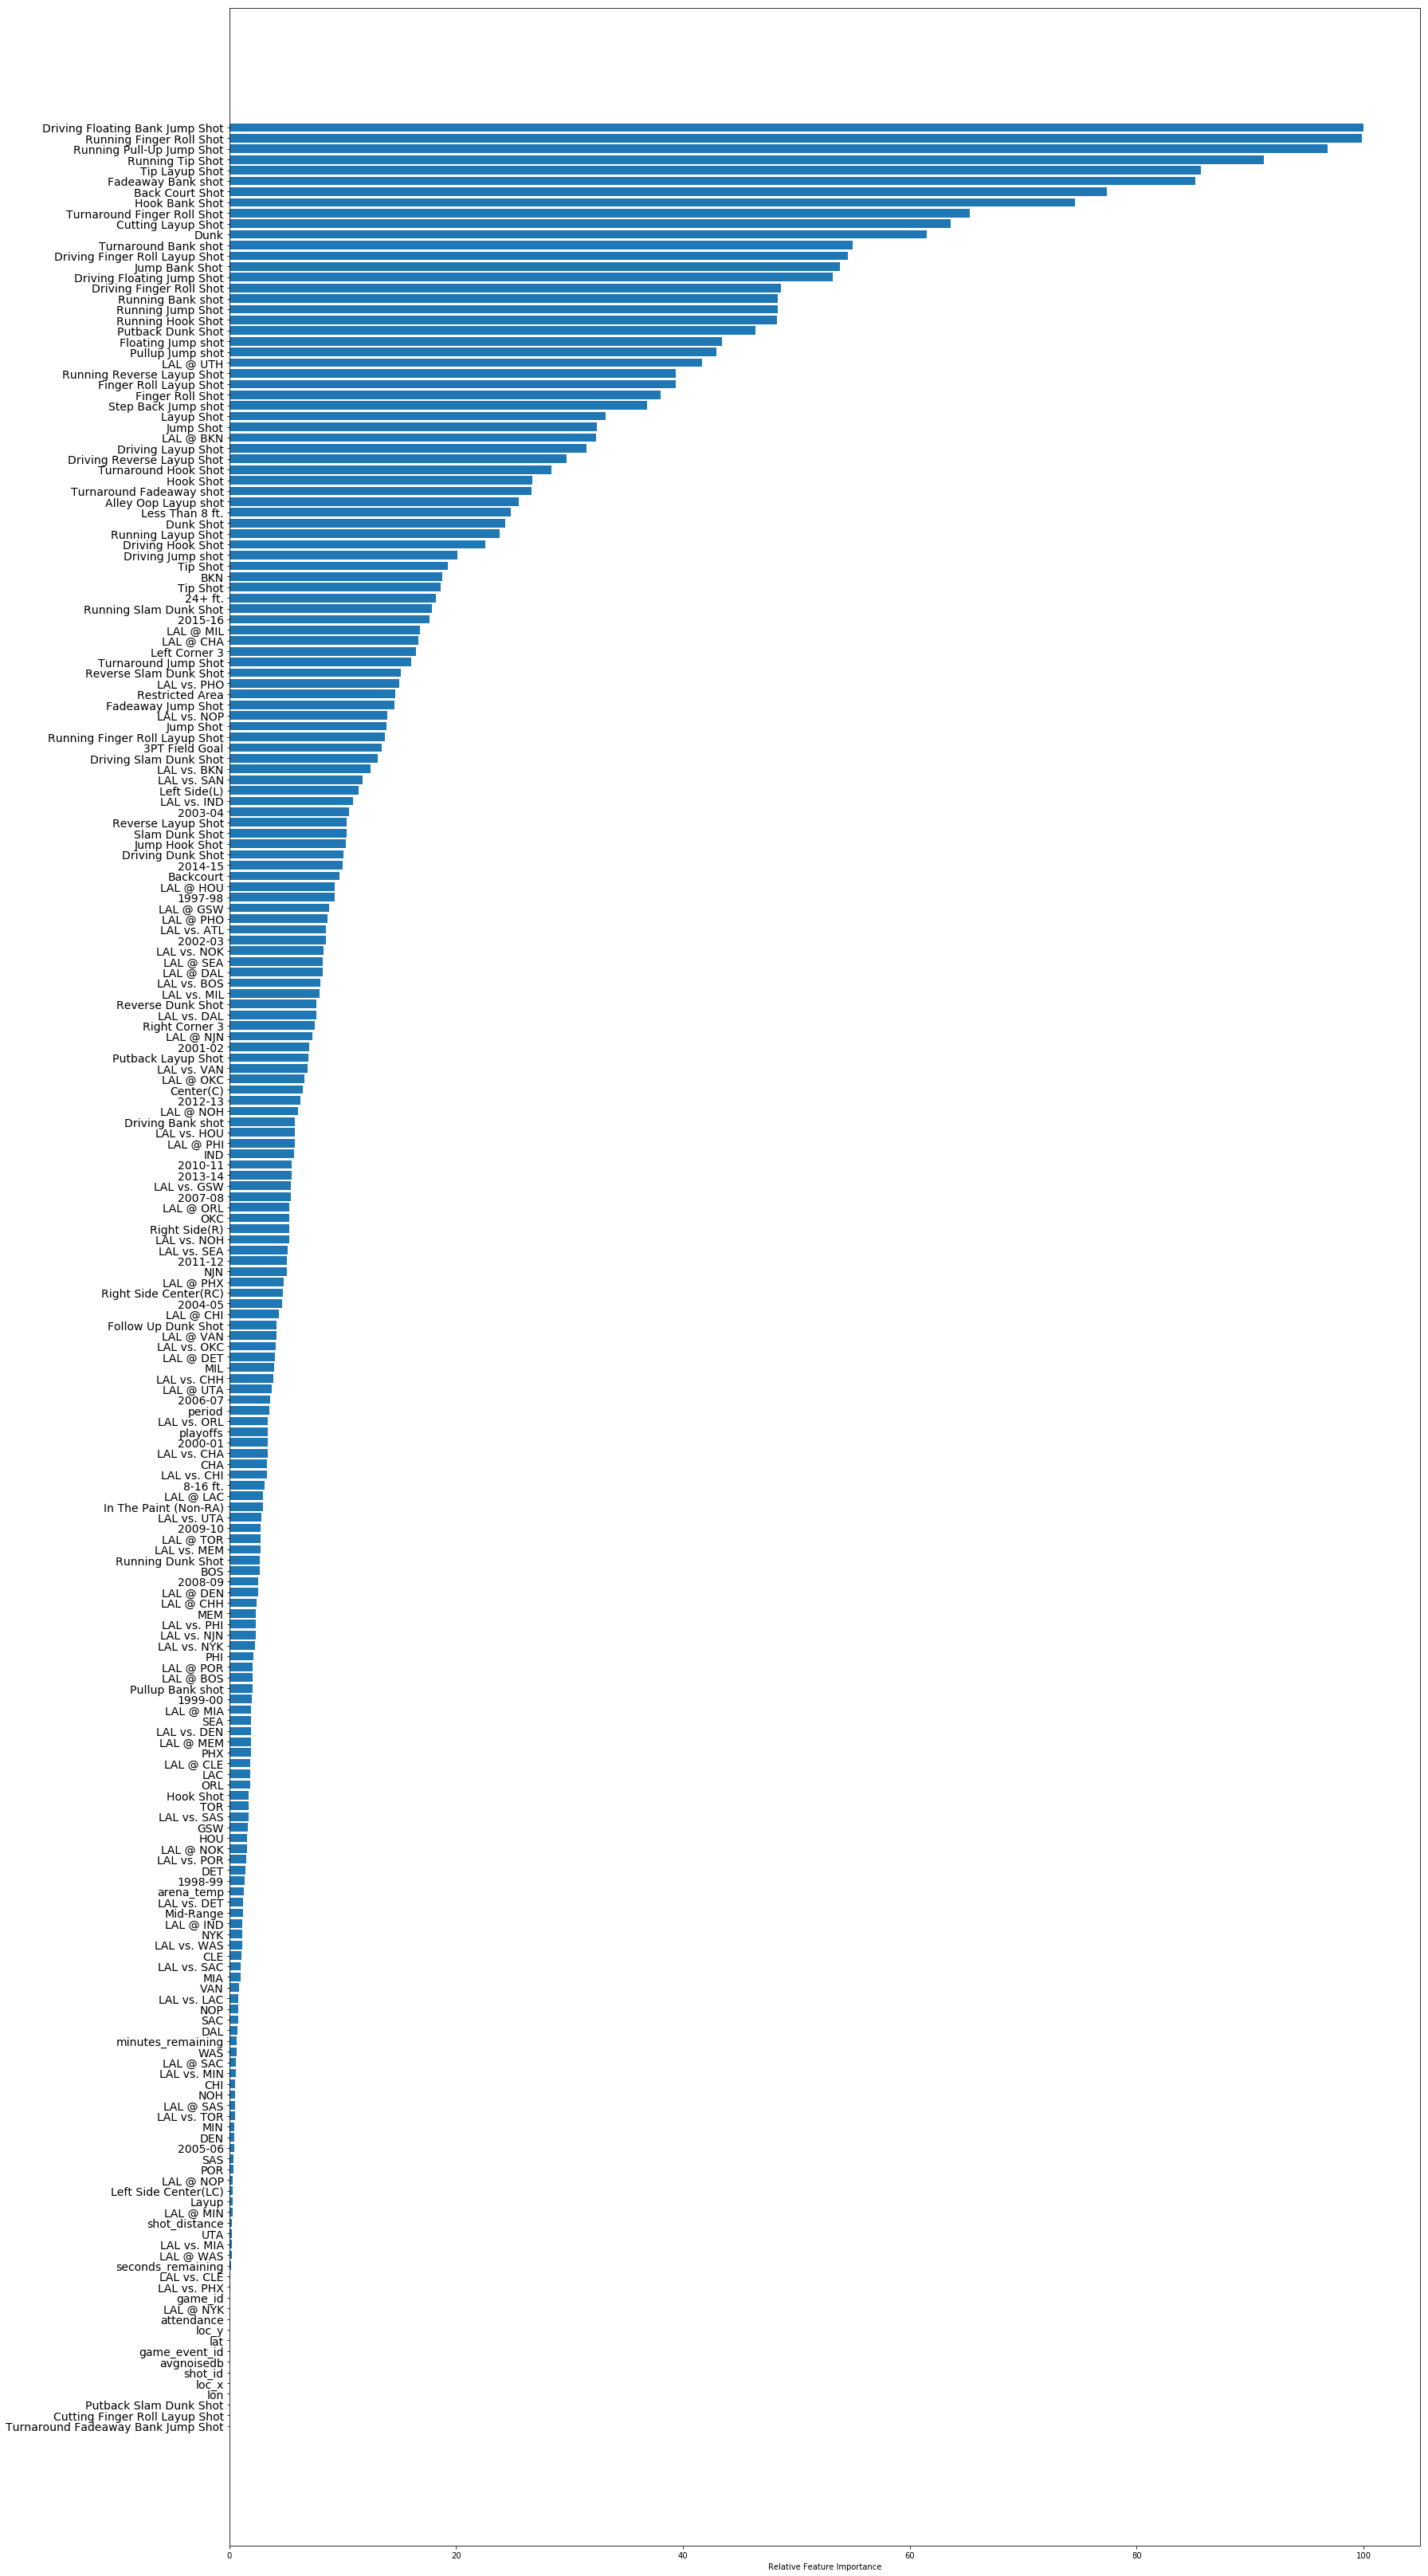

In [111]:
feature_importance = abs(ldamodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(25,45))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

IndexError: index 8552 is out of bounds for axis 1 with size 216

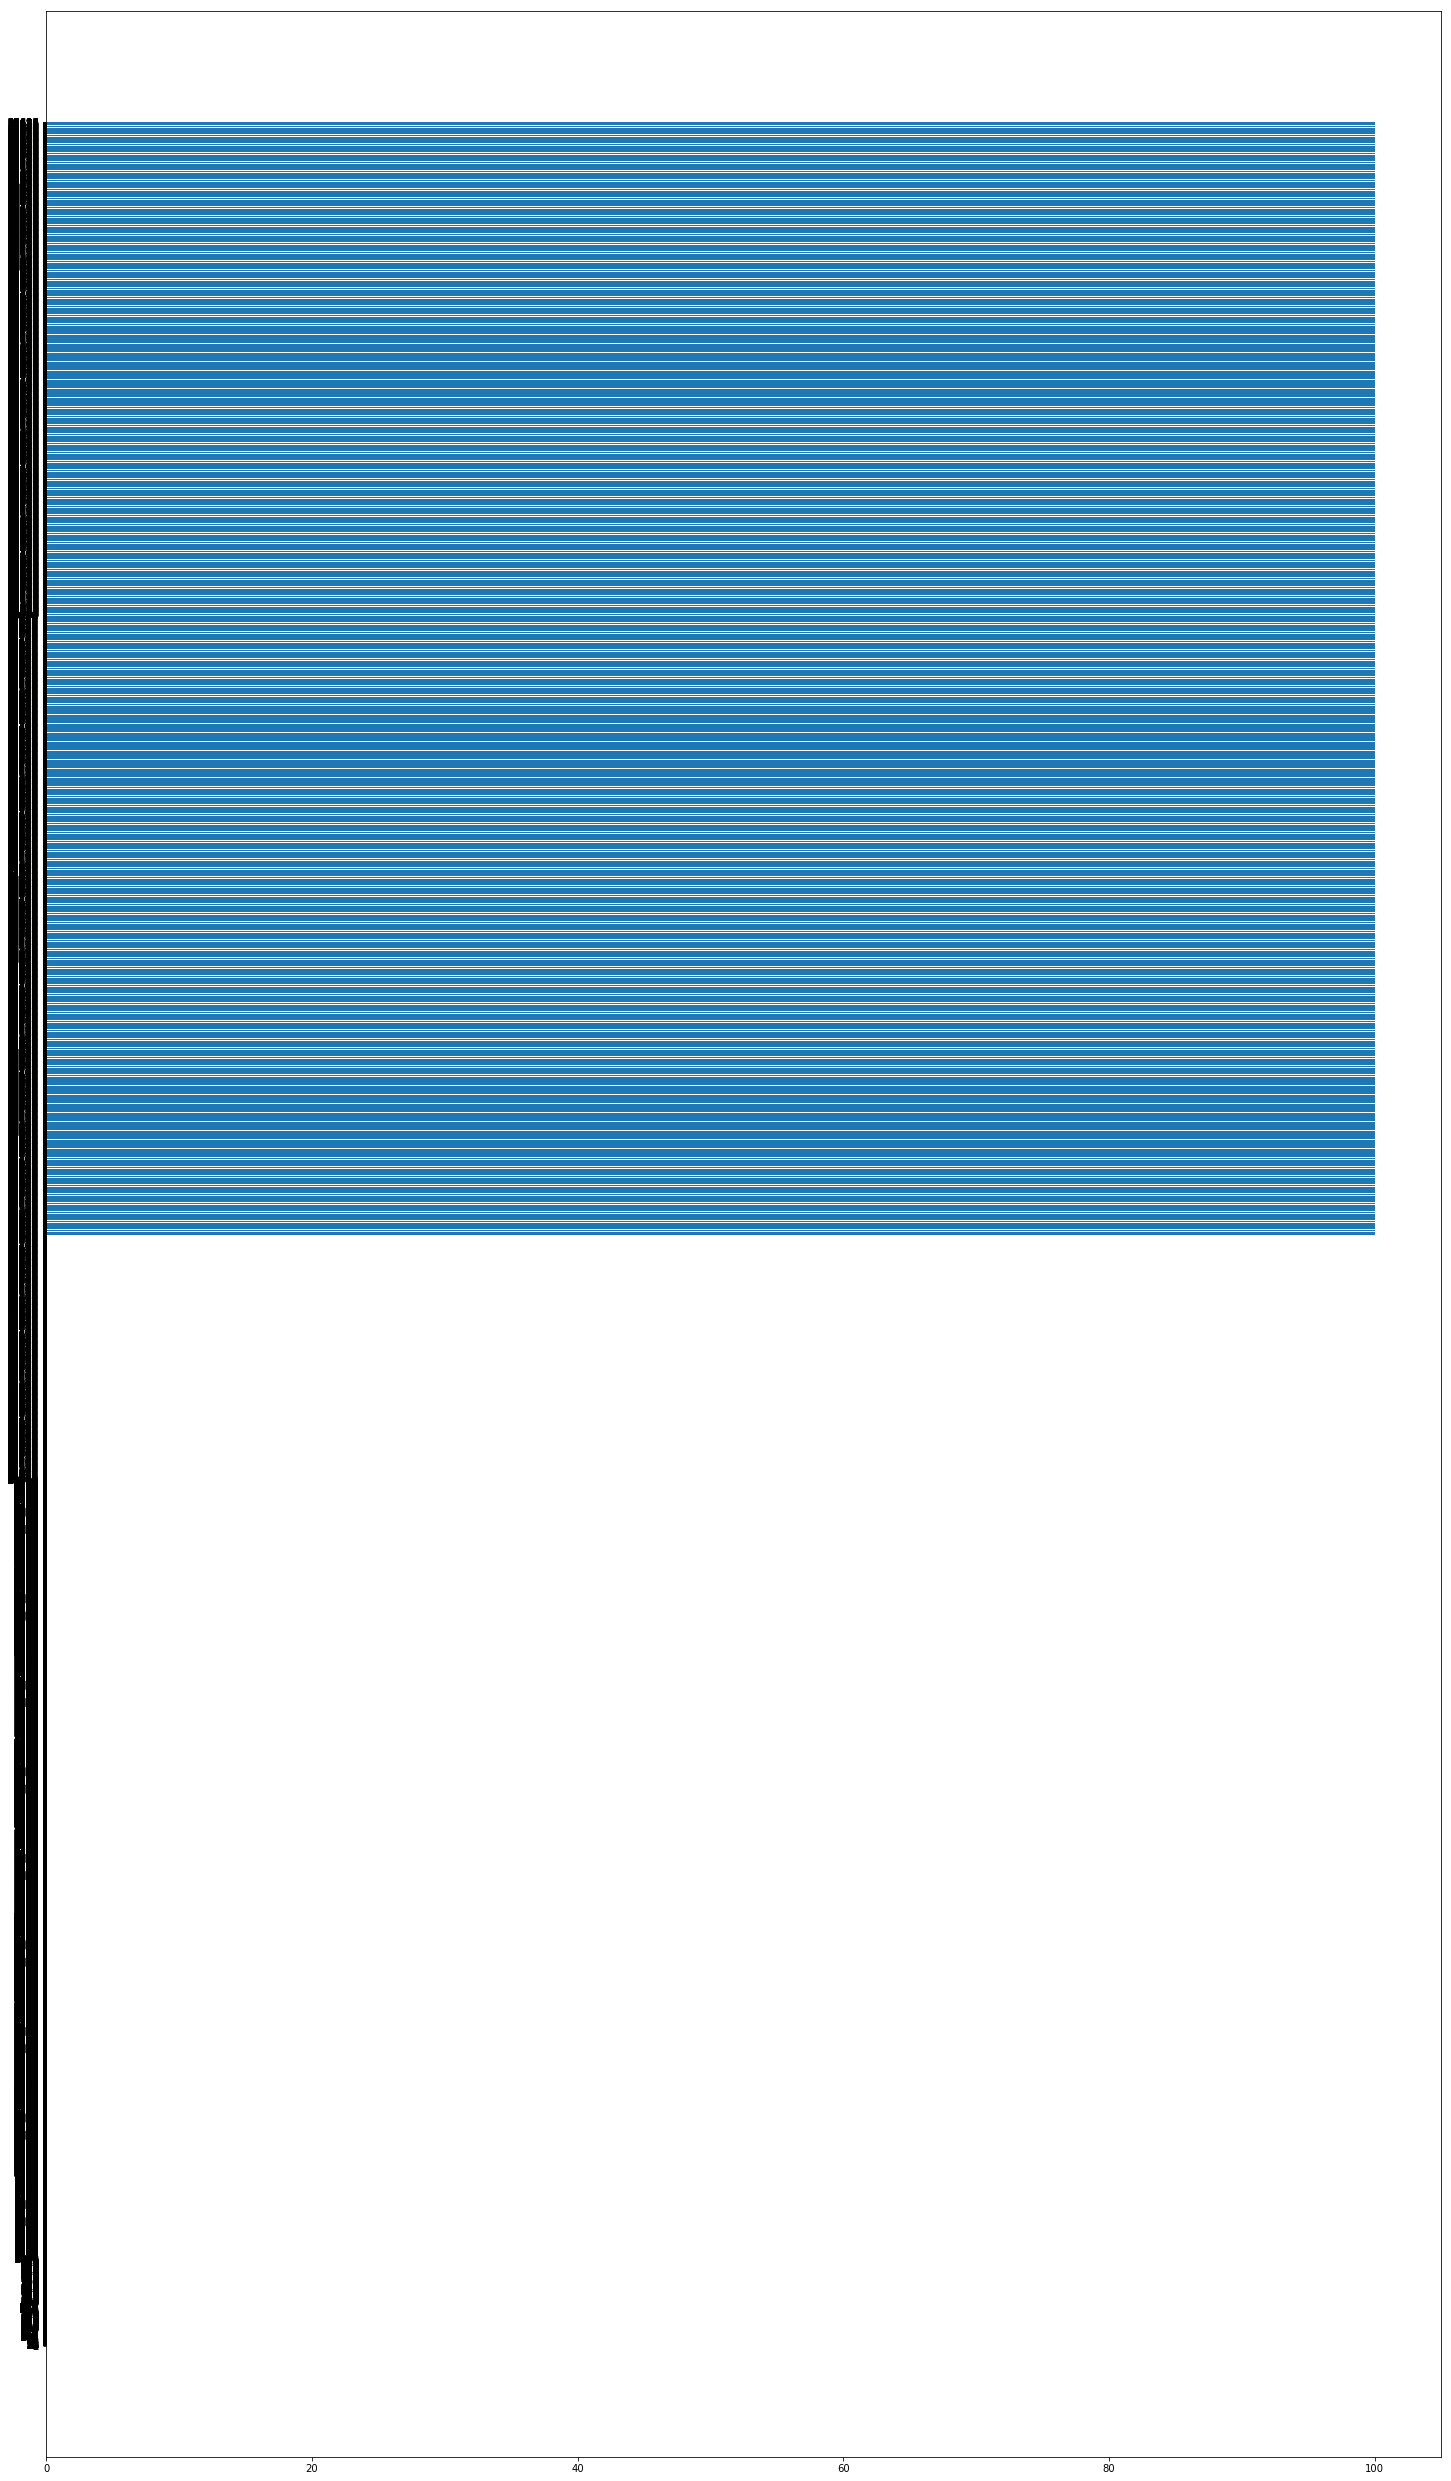

In [112]:
feature_importance = abs(km.labels_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(25,45))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [113]:
ldamodel.coef_[0]

array([  3.08580664e-04,   1.11300752e-03,   3.71022972e-04,
         1.60074133e-05,  -3.71022972e-04,   1.60074133e-05,
         1.74816846e-02,  -9.68015276e-02,   9.30762262e-02,
         3.64000817e-03,   6.96821059e-03,   5.08765766e-04,
         3.41073828e-02,   1.10688141e-04,   6.95515772e-01,
        -1.21113739e-15,   1.73326090e+00,  -1.58433439e-01,
         2.73444780e-01,   1.48707910e+00,   1.32566621e+00,
         2.72633630e+00,  -1.45075599e+00,   6.14455112e-01,
         5.48257714e-01,   8.58669474e-01,   8.10776043e-01,
         3.56623683e-01,  -6.63443478e-01,   2.32258473e+00,
         3.97504118e-01,   1.07329918e+00,  -1.03667658e+00,
         1.18474118e+00,  -1.14077873e-01,   2.03218155e+00,
        -7.28291472e-01,   1.46836935e+00,   2.80800909e-01,
        -8.83465356e-01,  -9.05400700e-01,  -5.52577647e-02,
         1.17106527e+00,  -1.26553556e+00,   1.89773223e-01,
        -3.75851211e-15,  -2.09959524e-01,   2.82569615e-01,
         4.12751804e-01,